<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Pressure" data-toc-modified-id="Pressure-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pressure</a></span><ul class="toc-item"><li><span><a href="#Regression-and-ARIMA-(SARIMAX)" data-toc-modified-id="Regression-and-ARIMA-(SARIMAX)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Regression and ARIMA (SARIMAX)</a></span></li></ul></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Linear-Regression-with-sklearn" data-toc-modified-id="Linear-Regression-with-sklearn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Linear Regression with sklearn</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#AdaBoostRegressor" data-toc-modified-id="AdaBoostRegressor-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>AdaBoostRegressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Random-Forest-Regressor</a></span></li><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>XGBoost Regressor</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regressor-for-2018" data-toc-modified-id="XGBoost-Regressor-for-2018-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>XGBoost Regressor for 2018</a></span></li></ul></li><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#Support-Vector-Regressor" data-toc-modified-id="Support-Vector-Regressor-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Support Vector Regressor</a></span></li><li><span><a href="#Auto-Regressive-Integrated-Moving-Average---ARIMA" data-toc-modified-id="Auto-Regressive-Integrated-Moving-Average---ARIMA-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Auto Regressive Integrated Moving Average - ARIMA</a></span></li></ul></li></ul></div>

# Predictive Modeling
## Pressure
### Regression and ARIMA (SARIMAX)

In [3]:
# importing packages

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
sns.set()

## Helper Functions

In [4]:
# helper function for polynomial regression

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    #print("The model performance for the training set")
    #print("-------------------------------------------")
    #print("RMSE of training set is {}".format(rmse_train))
    #print("R2 score of training set is {}".format(r2_train))
  
    #print("\n")
  
    #print("The model performance for the test set")
    #print("------------------------------------------")
    #print("RMSE of test set is {}".format(rmse_test))
    #print("R2 score of test set is {}".format(r2_test))
    


In [5]:
def prediction_plot(x,y,z,a,b):

    plt.figure(figsize=(10,5))
    plt.plot(x.values)
    plt.plot(y)
    plt.title(b,fontsize=14)
    plt.ylabel(z)
    plt.xlabel('Hour')
    labels=('actual','predicted')
    plt.legend(labels)
    plt.savefig(a, dpi=500);

In [7]:
## load cleaned weather data

df = pd.read_csv('weather_data_cleaned.csv', index_col='MESS_DATUM', parse_dates=True)
df = df.iloc[:,1:]
df

,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,1020.2,2.2,350.0,5.6,5.50,5.20,4.6,5.20,2000.0
2005-01-01 01:00:00,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,1020.5,1.5,310.0,5.3,5.40,5.20,4.6,5.10,3500.0
2005-01-01 02:00:00,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,1021.3,1.5,280.0,4.7,5.10,5.10,4.6,5.10,800.0
2005-01-01 06:00:00,113.0,0.0,0.0,0.0,104.08,0.0,2.0,98.0,1.7,8.0,1022.0,2.3,220.0,3.7,4.20,4.70,4.8,5.20,3500.0
2005-01-01 07:00:00,114.0,0.0,0.0,0.0,96.06,0.0,2.7,100.0,2.7,7.0,1021.8,2.8,210.0,3.6,4.00,4.50,4.7,5.20,4500.0
2005-01-01 08:00:00,117.0,3.0,3.0,0.0,88.98,0.2,3.7,100.0,3.7,8.0,1021.7,3.4,210.0,3.6,4.00,4.50,4.7,5.20,1800.0
2005-01-01 09:00:00,116.0,10.0,10.0,0.0,83.19,0.0,4.3,97.0,3.9,8.0,1022.1,3.3,220.0,3.8,4.00,4.40,4.8,5.30,4500.0
2005-01-01 10:00:00,115.0,23.0,23.0,0.0,79.05,0.0,5.1,93.0,4.0,7.0,1021.6,4.3,230.0,4.0,4.00,4.40,4.8,5.30,12000.0
2005-01-01 11:00:00,116.0,20.0,20.0,0.0,76.88,0.0,5.3,92.0,4.1,7.0,1021.2,4.6,220.0,4.3,4.20,4.40,4.7,5.30,8000.0


In [9]:
# calculating pearson correlation

corr = df.corr(method ='pearson')
corr.P[abs(corr.P) > 0.1]

ATMO_LBERG   -0.213757
SD_LBERG      0.148624
R1           -0.154324
RF_TU        -0.111448
TD           -0.121584
V_N          -0.258391
P             1.000000
FF           -0.286196
Name: P, dtype: float64

In [114]:
## Linear Regression with most significant features

model = 'P ~ ATMO_LBERG + SD_LBERG + RF_TU + V_N + FF'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4188.
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:30:18   Log-Likelihood:            -4.8440e+05
No. Observations:              134437   AIC:                         9.688e+05
Df Residuals:                  134430   BIC:                         9.689e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1038.8582      0.280   3712.663      0.000    1038.310    1039.407
ATMO_LBERG    -0.0938      0.002    -54.828      0.000      -0.097      -0.090
SD_LBERG       0.0249      0.002     16.324      0.000       0.022       0.028
RF_TU         -0.0859      0.002    -42.790      0.000      -0.090      -0.082
V_N           -0.2347      0.012    -19.518      0.000      -0.258      -0.211
V_S1_HHS     1.29e-05   1.16e-05      1.116      0.264   -9.75e-06    3.56e-05
FF            -1.3301      0.012   -107.518      0.000      -1.354      -1.306
==============================================================================
Omnibus:                     2474.378   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3421.267
Skew:                          -0.230   Prob(JB):                         0.00
Kurtosis:                       3.632   Cond. No.                     3.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression with sklearn

In [11]:
## linear regression with sklearn

X = df[['SD_LBERG', 'ATMO_LBERG', 'RF_TU', 'V_N', 'R1', 'FF', 'TD']]
Y = df.P

# train/test split

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

# modeling
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_pred = lin_model.predict(X_test)

# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values.ravel(), y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('Mean Squared Error:', round(rmse0, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 4.87
Mean Squared Error: 5.68
R-squared scores: -2.41


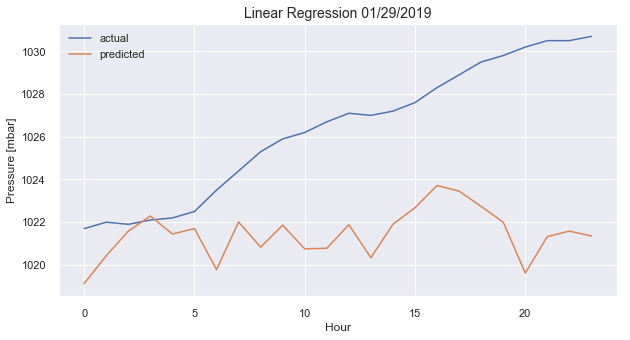

In [12]:
prediction_plot(Y_test, y_pred, 'Pressure [mbar]','Press_LinReg.png','Linear Regression 01/29/2019')

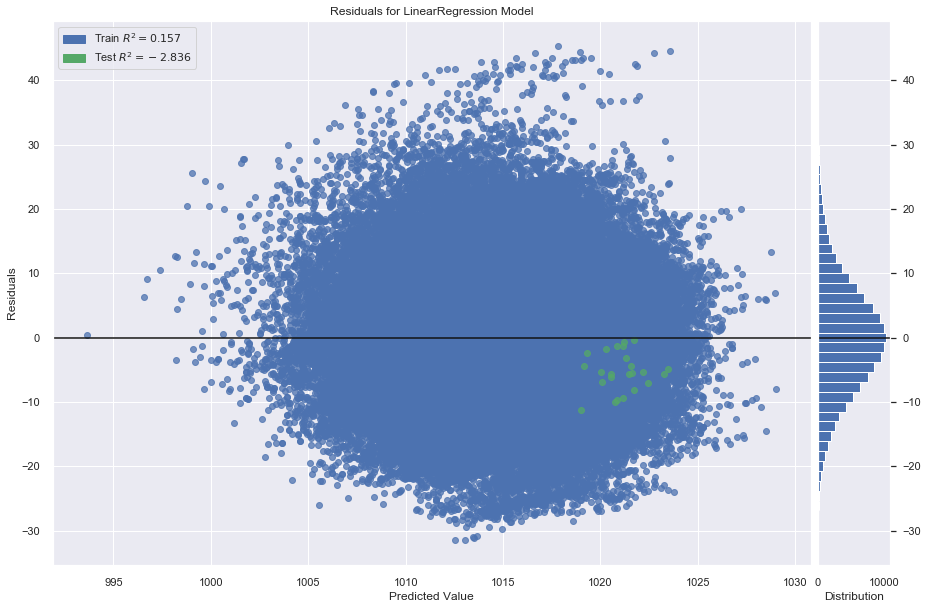

In [26]:
# generate residuals plot
visualizer = ResidualsPlot(lin_model, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show();          

## Polynomial Regression

Degree: 1 R2 -2.8361111966319235 RMSE 6.028854533734799
Degree: 2 R2 -2.4462416671223473 RMSE 5.714287354115091
Degree: 3 R2 -2.634478783459936 RMSE 5.868272605690094
Degree: 4 R2 -3.332669924792074 RMSE 6.407181308300929
Degree: 5 R2 -2.383464769874272 RMSE 5.662002291932671


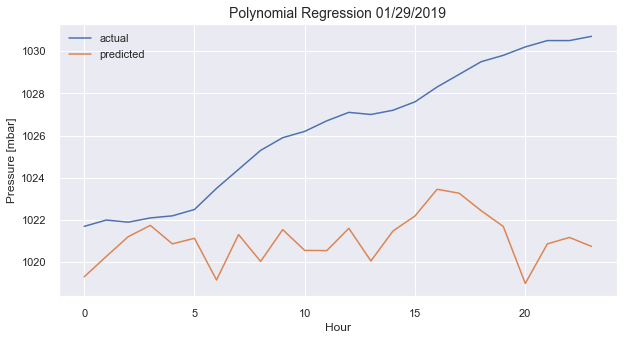

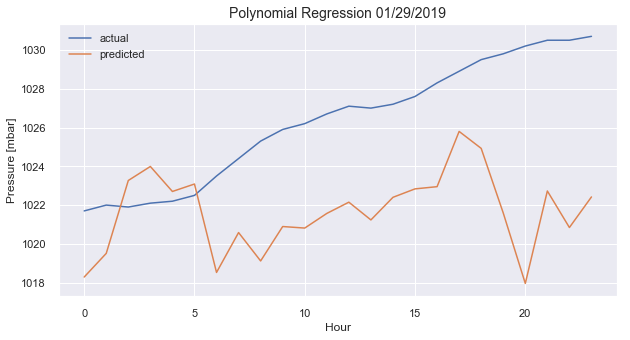

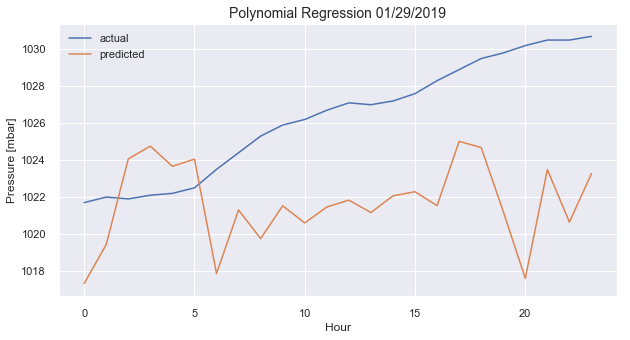

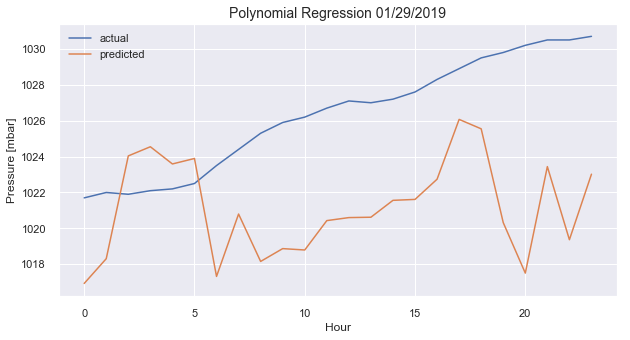

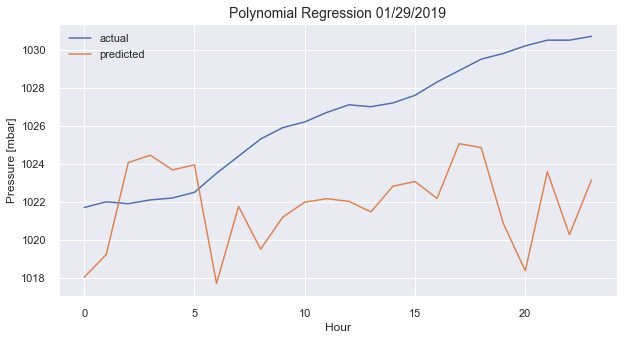

In [190]:
 
X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

performance_pressure1 = []
performance_pressure2 = []
for i in range(1,6,1):
    
    poly_features = PolynomialFeatures(degree=i)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    performance_pressure1.append(r2_test)
    performance_pressure2.append(rmse_test)
    print("Degree: {}".format(i),"R2 {}".format(performance_pressure1[-1]), "RMSE {}".format(performance_pressure2[-1]))
    
    prediction_plot(Y_test,y_test_predict, 'Pressure [mbar]','Press_poly.png','Polynomial Regression 01/29/2019')

## GradientBoostingRegressor

In [191]:
from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile", alpha=LOWER_ALPHA, learning_rate=.1, n_estimators=500)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls",learning_rate=.1, n_estimators=500)
upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA, learning_rate=.1, n_estimators=500)

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

# Fit models
lower_model.fit(X_train, Y_train)
mid_model.fit(X_train, Y_train)
upper_model.fit(X_train, Y_train)

# Record actual values on test set
predictions = pd.DataFrame(Y_test)
# Predict
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

In [192]:
predictions.head()

,P,lower,mid,upper
134389,1021.7,1007.818577,1019.663986,1031.689867
134390,1022.0,1010.068389,1020.951593,1030.323224
134391,1021.9,1015.761380,1024.042453,1032.860525
134392,1022.1,1016.310663,1024.100936,1033.214642
134393,1022.2,1014.446003,1024.074355,1032.502429


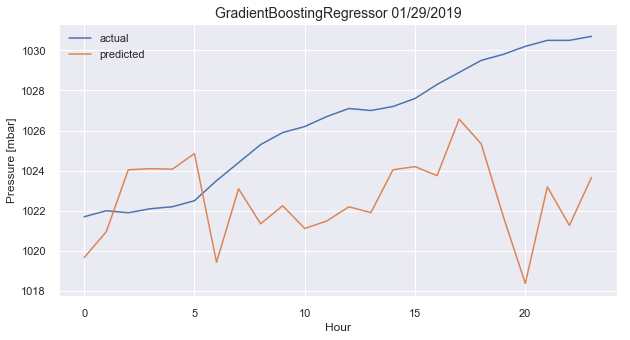

In [193]:
prediction_plot(predictions.P,predictions.mid.values,'Pressure [mbar]','Press_GradBoost.png','GradientBoostingRegressor 01/29/2019')

In [194]:
# Metrics
predictions['mid_dev_abs'] = abs(predictions.P-predictions.mid)
predictions['mid_r2'] = r2_score(predictions.P, predictions.mid)
predictions['lower_dev_abs'] = abs(predictions.P-predictions.lower)
predictions['lower_r2'] = r2_score(predictions.P, predictions.lower)
predictions['upper_dev_abs'] = abs(predictions.P-predictions.upper)
predictions['upper_r2'] = r2_score(predictions.P, predictions.upper)

print('RMSE:',predictions.lower_dev_abs.mean(),predictions.mid_dev_abs.mean(),predictions.upper_dev_abs.mean())
print('R2:', predictions.lower_r2.mean(),predictions.mid_r2.mean(),predictions.upper_r2.mean())

RMSE: 13.544592733095405 4.408159307984728 5.446547946638172
R2: -20.093501647909598 -1.7760714441464804 -3.1737823668110767


## AdaBoostRegressor

In [195]:
X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

regr = AdaBoostRegressor(random_state=0, n_estimators=10000, learning_rate=1)
regr.fit(X_train, Y_train)
regr.feature_importances_
y_pred = regr.predict(X_test)

In [196]:
#del test
y_pred=pd.DataFrame(y_pred)
test = pd.concat([y_pred,Y_test.reset_index()],axis=1)
test.drop(columns='index',inplace=True)


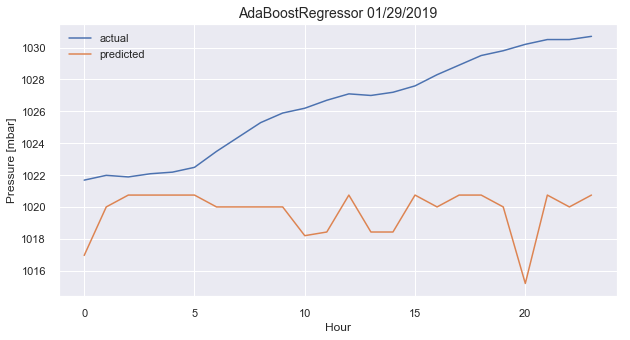

In [197]:
prediction_plot(test.P,test.iloc[:,0],'Pressure [mbar]','Press_ADABoost.png','AdaBoostRegressor 01/29/2019')

In [155]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 6.59
RMSE: 7.44
R2: -4.85


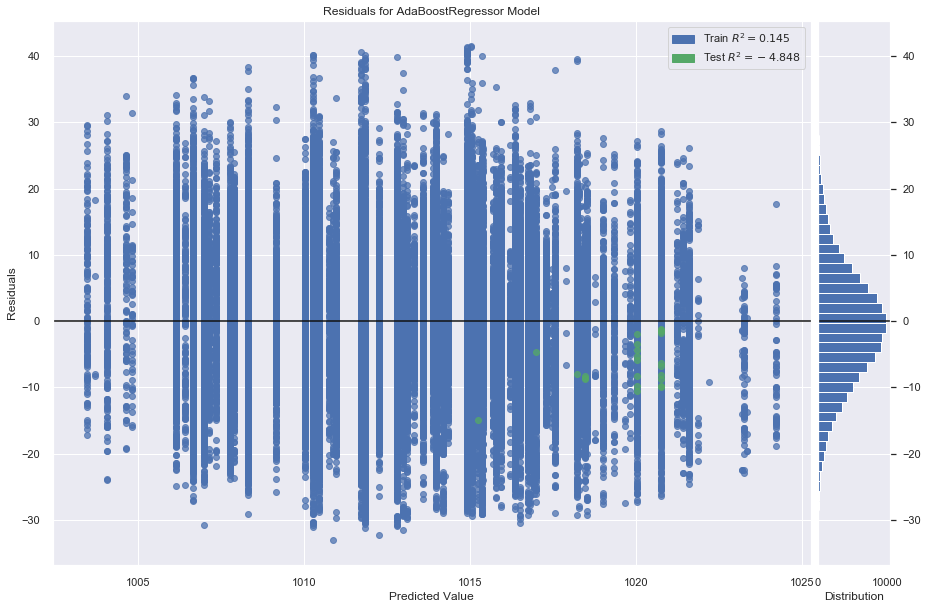

In [46]:
# generating residuals plot
visualizer = ResidualsPlot(regr, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

## Random-Forest-Regressor

In [198]:
X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

In [199]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 4.78
RMSE: 6.34
R2: -3.25


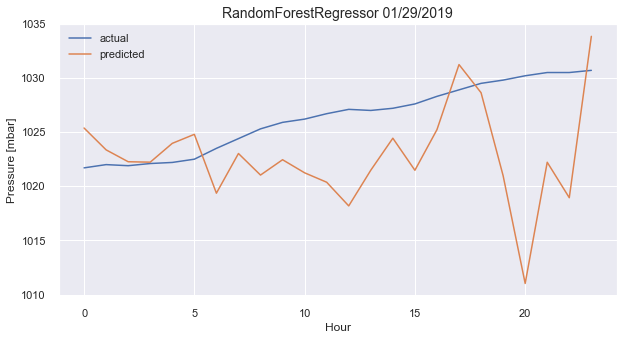

In [200]:
prediction_plot(Y_test, Y_pred,'Pressure [mbar]','Press_RFR.png','RandomForestRegressor 01/29/2019')

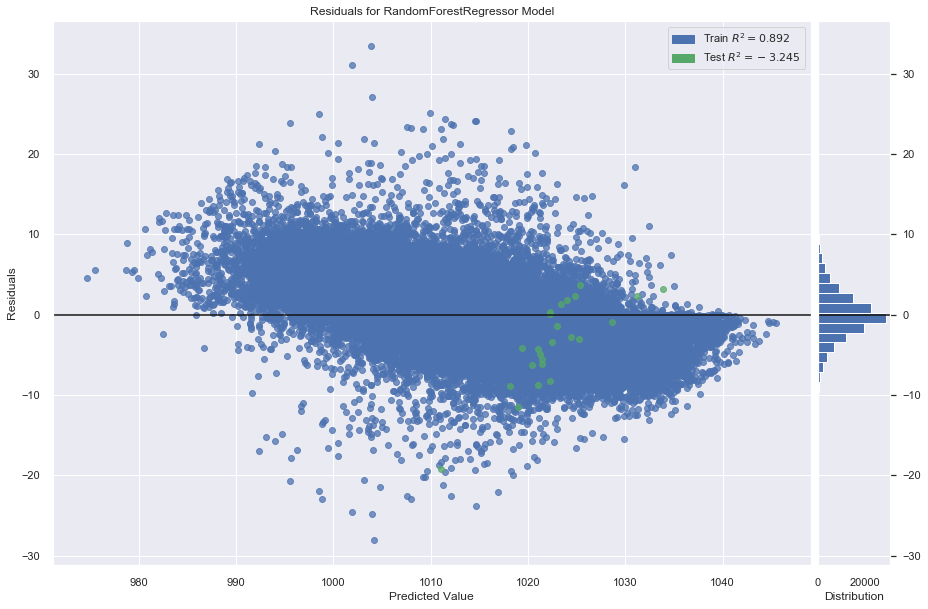

In [51]:
# generating residuals plot
visualizer = ResidualsPlot(rf, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [52]:
## Feature importances :

feature_list = X.columns

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FF                   Importance: 0.25
Variable: ATMO_LBERG           Importance: 0.24
Variable: RF_TU                Importance: 0.18
Variable: V_S1_HHS             Importance: 0.18
Variable: V_N                  Importance: 0.1
Variable: SD_LBERG             Importance: 0.05


In [45]:
# Performing GridSearchCV on RF-Regressor

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

rf_model = RandomForestRegressor()
 
parameters = {'criterion': ['mse'],
              'max_depth': np.arange(3,11,1),
              'max_features': ['auto'],
              'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0],
              'min_impurity_split': [None],
              'min_samples_leaf': [1],
              'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0],
              'n_estimators': np.arange(10,100,1),
              'n_jobs': [-1],
              'oob_score': [False],
              'random_state': [0],
              'verbose': [0],
              'warm_start': [False]}


rf_grid = GridSearchCV(rf_model, parameters, cv = 5 ,n_jobs = 5, verbose=True)

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 14.0min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 25.3min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 43.9min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 64.9min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 99.8min
[Parallel(n_jobs=5)]: Done 3600 out of 3600 | elapsed: 121.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=Non...
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63,

In [46]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 69,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [56]:
## RandomForestRegressor with best parameters

rf = RandomForestRegressor(max_depth=None,max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf =0.0, n_estimators=1000, random_state=0, oob_score=False, verbose=0)
                           

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

In [57]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.69
RMSE: 1.97
R2: 0.66


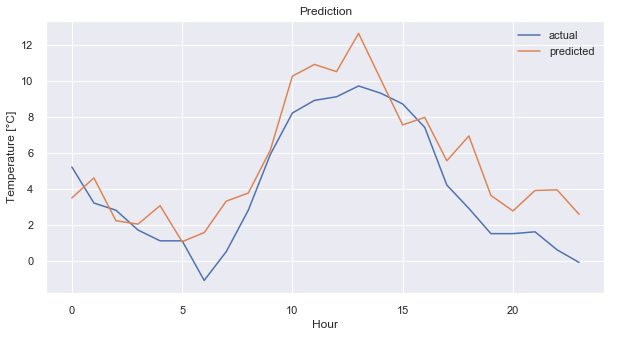

In [58]:
prediction_plot(Y_test, Y_pred,'Pressure [mbar]')

## XGBoost Regressor

In [201]:
X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

model = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.1)
model.fit(X_train,Y_train)

#Prediction
Y_pred = model.predict(data=X_test)

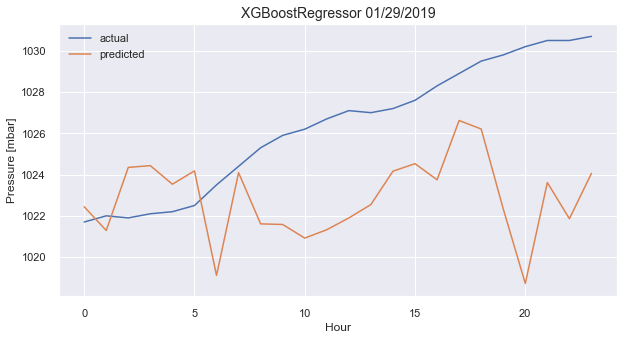

In [202]:
prediction_plot(Y_test, Y_pred,'Pressure [mbar]','PressXGB.png','XGBoostRegressor 01/29/2019')

In [203]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 4.15
RMSE: 4.92
R2: -1.56


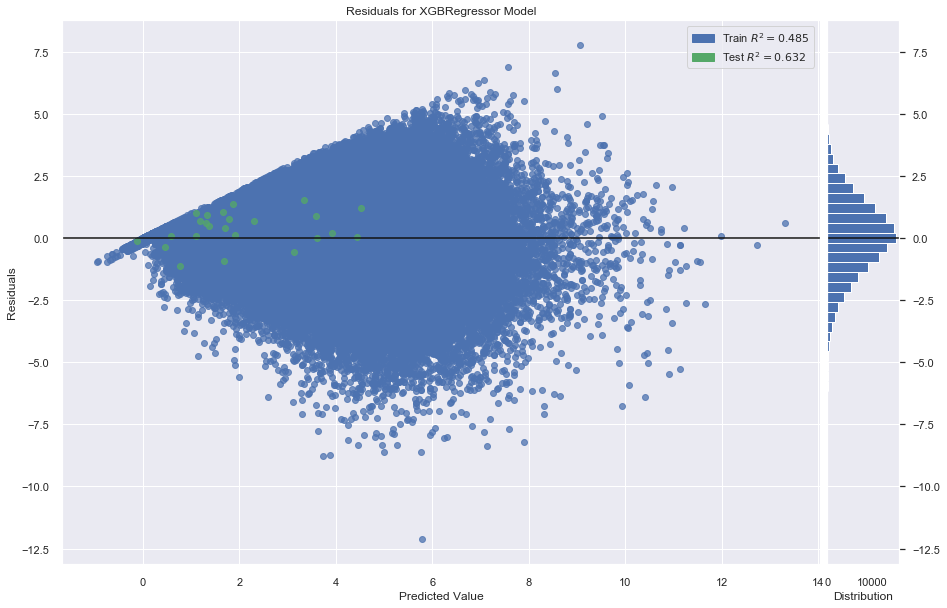

In [114]:
# generating residuals plot
visualizer = ResidualsPlot(model, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [60]:
# Performing GridSearchCV on XGBoostRegressor

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

xgb_model = xgb.XGBRegressor()

parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': np.arange(0.1, 1, 0.2), 
              'max_depth': np.arange(3,6,1),
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': np.arange(500,3000,500)}


xgb_grid = GridSearchCV(xgb_model, parameters, cv = 5 ,n_jobs = 5, verbose=True)

xgb_grid.fit(X_train,Y_train)



Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 10.5min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 63.9min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed: 183.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=...
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'max_depth': array([3, 4, 5]), 'min_child_weight': [4],
                         'n_estimators': array([ 500, 1000, 1500, 2000, 2500]),
  

In [61]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6683311628078997
{'colsample_bytree': 0.7, 'learning_rate': 0.30000000000000004, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [62]:
# XGB-Regressor with best parameters

model = xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.3, max_depth= 3, min_child_weight= 4,
                         n_estimators= 1000, nthread= 4, silent= 1, subsample= 0.7)
model.fit(X_train,Y_train)

#Prediction
Y_pred = model.predict(data=X_test)

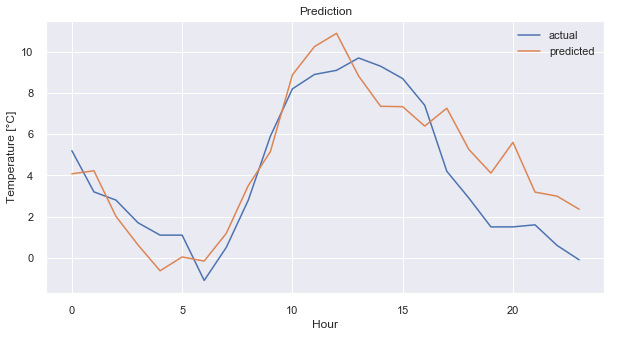

In [63]:
prediction_plot(Y_test, Y_pred,'Pressure [mbar]')

In [64]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 1.56
RMSE: 1.79
R2: 0.73


### XGBoost Regressor for 2018

In [13]:
# train/test split

X = df[['SD_LBERG', 'ATMO_LBERG', 'RF_TU', 'V_N', 'R1', 'FF', 'TD']]
Y = df.P

test_period = pd.date_range('2018-01-01', '2018-12-31', freq='D')
test_period = test_period.astype(str)
train_period = pd.date_range('2017-12-31', '2018-12-30', freq='D')
train_period = train_period.astype(str)

mae_sum=0
predictions = []
for i,j in zip(test_period, train_period):
    
    X_train = X.loc[:j]
    X_test = X.loc[i]
    Y_train = Y.loc[:j]
    Y_test = Y.loc[i]
    
    model = xgb.XGBRegressor(n_estimators=500,learning_rate=0.7)
    model.fit(X_train,Y_train)
    y_pred = model.predict(data=X_test)
    predictions.append(y_pred)
    
    # Metrics
    mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
    # sum of mean absolute error
    mae_sum+=abs(mae0)

predictions = pd.DataFrame(predictions)
predictions = predictions.stack().reset_index().rename(columns={0:'pred'})

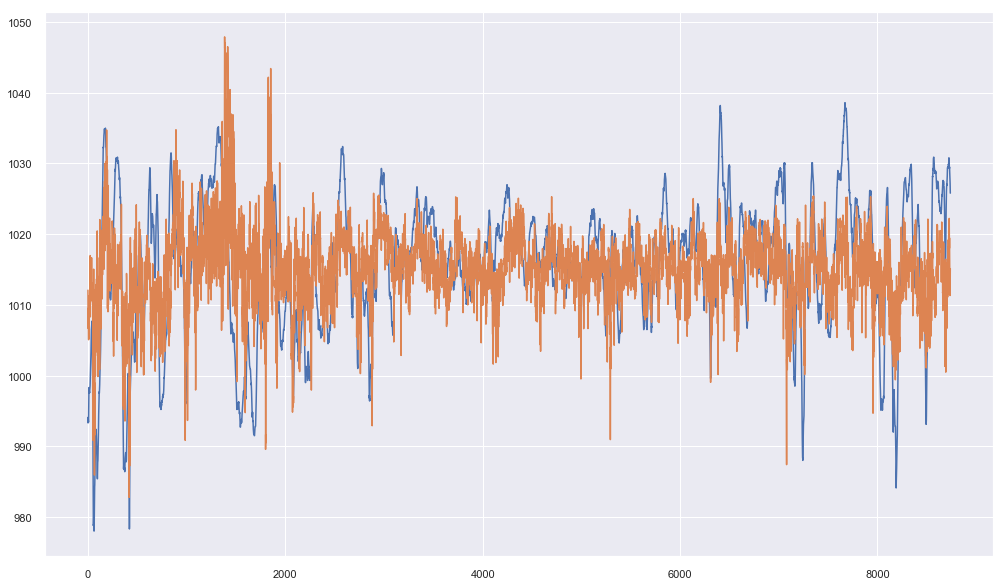

In [14]:
plt.figure(figsize=(17,10))
plt.plot(Y.loc['2018-01-01':'2018-12-31'].values)
plt.plot(predictions.pred)

In [16]:
mae_sum/365

6.534709419858004

In [17]:
predictions.to_csv(r'Press_XGB_2018_500estimators.csv')

## KNeighborsRegressor

In [204]:
X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, Y_train)
Y_pred = knr.predict(X_test)

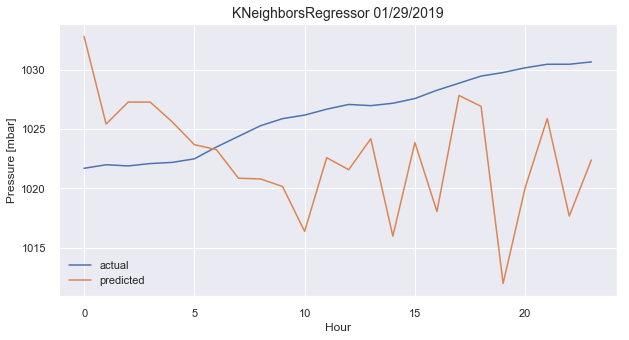

In [205]:
prediction_plot(Y_test, Y_pred,'Pressure [mbar]','Press_KNN.png','KNeighborsRegressor 01/29/2019')

In [176]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), Y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), Y_pred))
r2 = r2_score(Y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 6.19
RMSE: 7.51
R2: -4.95


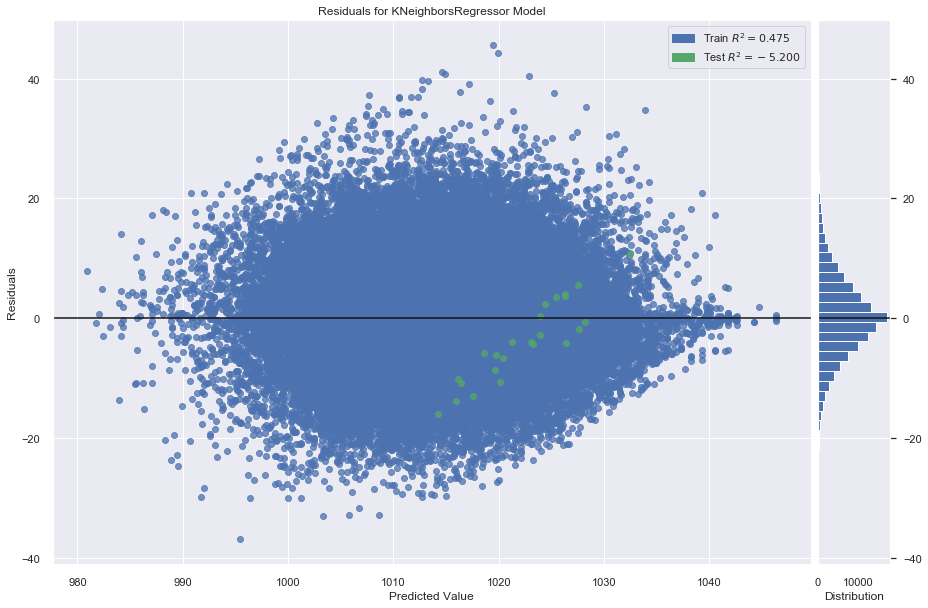

In [59]:
# generating residuals plot
visualizer = ResidualsPlot(knr, size=(1080,720))
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show();

## Support Vector Regressor

In [ ]:
# take a lot of time
from sklearn.svm import SVR
clf = SVR(kernel='poly', degree=3, C=1.0, gamma='auto', epsilon=0.2)
Y_pred = clf.fit(X_train, Y_train).predict(X_test)


In [ ]:
## Trying out different kernels

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, Y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], Y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     Y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
svr_poly
svr.fit(X, Y).predict(X)

## Auto Regressive Integrated Moving Average - ARIMA

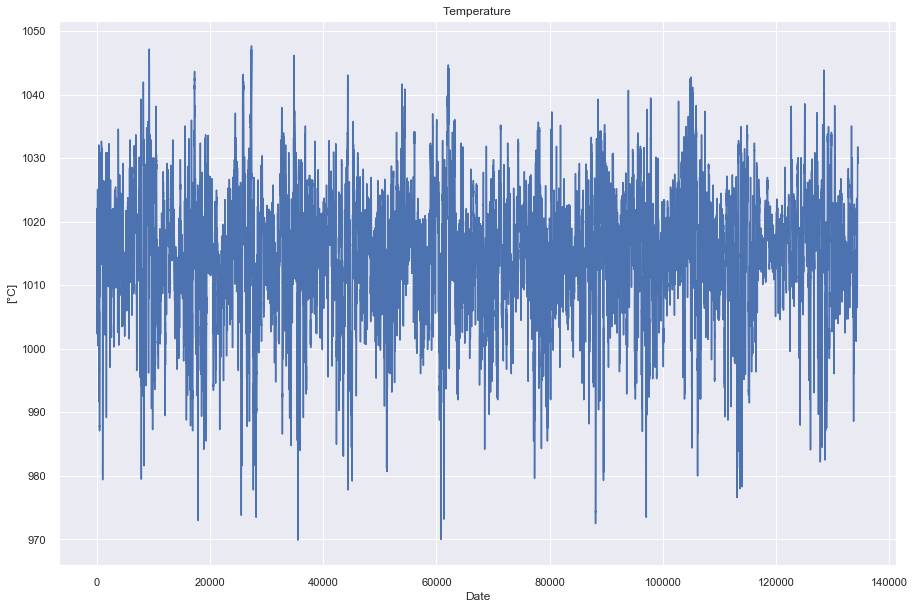

In [60]:
plt.figure(figsize=(15,10))
plt.plot(df.P.values)
plt.xlabel('Date')
plt.ylabel('[°C]')
plt.title('Temperature');


In [61]:
df_press = pd.concat([df.MESS_DATUM,df.P],axis=1)
df_press.set_index(['MESS_DATUM'],inplace=True)
df_arima_press = df_press[:-48]
df_arima_press.head()


,P
MESS_DATUM,
2005-01-01 00:01:00,1020.2
2005-01-01 01:01:00,1020.5
2005-01-01 02:01:00,1021.3
2005-01-01 06:01:00,1022.0
2005-01-01 07:01:00,1021.8


In [62]:
# Determine rolling statistics
rolmean = df_press.rolling(window=720).mean() #window size 720 denotes 1 month, giving rolling mean at yearly level
rolstd = df_press.rolling(window=720).std()
# print(rolmean,rolstd)

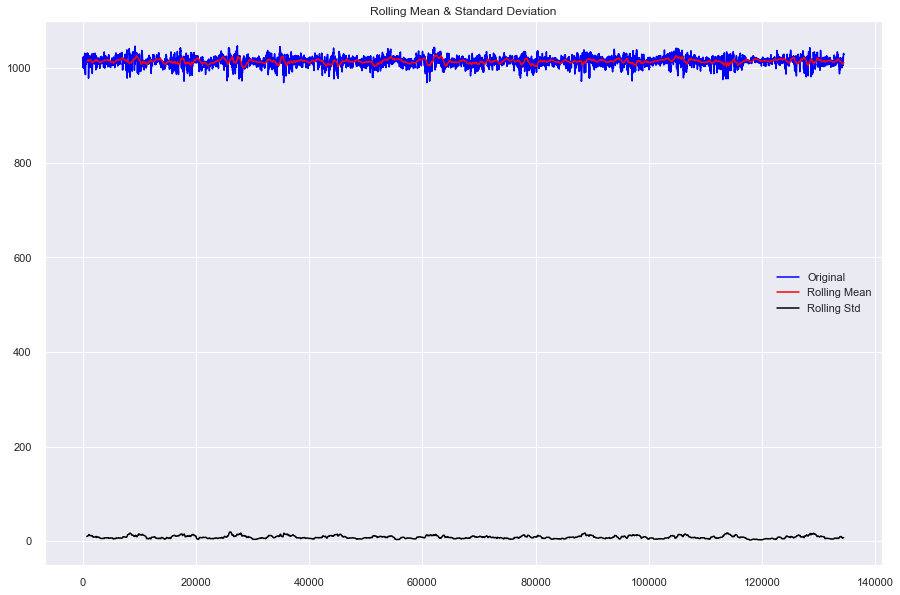

In [63]:
# Plot rolling statistics
plt.figure(figsize=(15,10))
plt.plot(df.P, color='blue', label='Original')
plt.plot(rolmean.values, color='red', label='Rolling Mean')
plt.plot(rolstd.values, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [64]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams


# Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(df_press.iloc[:,0].values, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -26.649358
p-value                             0.000000
#Lags Used                         73.000000
Number of Observations Used    134363.000000
Critical Value (1%)                -3.430399
Critical Value (5%)                -2.861562
Critical Value (10%)               -2.566781
dtype: float64


In [ ]:
# For a Time series to be stationary, its ADCF test should have:

# p-value to be low (according to the null hypothesis)  ---> accomplished
# The critical values at 1%, 5%, 10% confidence intervals should be as close as possible to the Test Statistics!
# The dataset is stationary!

# For non stationary dataset there are diffenent ways to achieve stationary: transformation with log, 
# exponential decay and time shift

In [ ]:
model = ARIMA(df.P, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
#plt.figure(figsize=(15,10))
#plt.plot(df.P)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df.P)**2))
#print('Plotting ARIMA model')

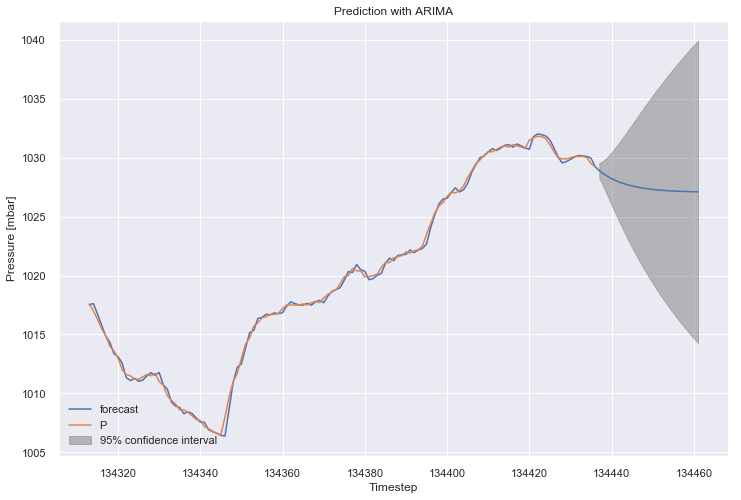

In [66]:
sns.set(rc={'figure.figsize':(12,8)})

results_ARIMA.plot_predict(len(df.P)-124,len(df.P)+24);
plt.legend(loc='lower left')
plt.title('Prediction with ARIMA')
plt.xlabel('Timestep')
plt.ylabel('Pressure [mbar]')
x=results_ARIMA.forecast(steps=24)

In [67]:
model = ARIMA(df_arima_press.values, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

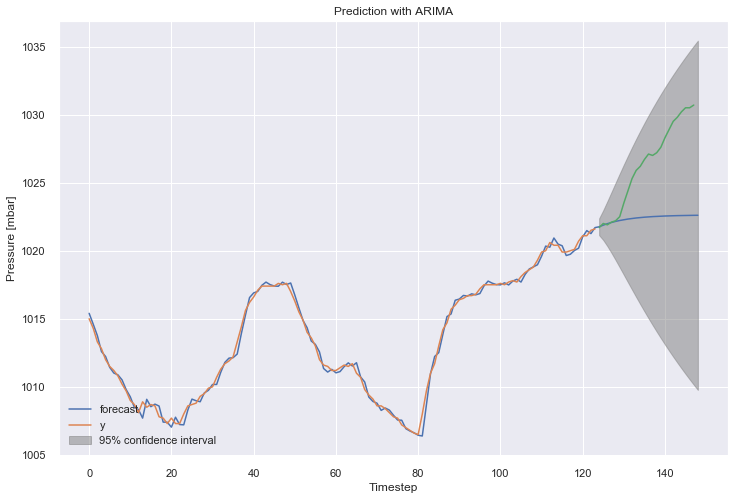

In [69]:
sns.set(rc={'figure.figsize':(12,8)})

results_ARIMA.plot_predict(len(df_arima_press)-124,len(df_arima_press)+24);
plt.legend(loc='lower left')
plt.title('Prediction with ARIMA')
plt.xlabel('Timestep')
plt.ylabel('Pressure [mbar]')
x=results_ARIMA.forecast(steps=24)
plt.plot(range(124,148,1),df_press.P.values[-48:-24])

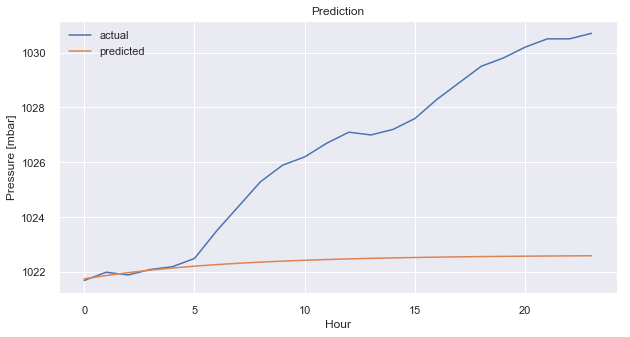

In [71]:
prediction_plot(df_press.P[-48:-24], pd.DataFrame(x[0]),'Pressure [mbar]')

In [72]:
# Metrics
mae0 = mean_absolute_error(df_press.P[-48:-24], pd.DataFrame(x[0]))
rmse0 = np.sqrt(mean_squared_error(df_press.P[-48:-24], pd.DataFrame(x[0])))
r2 = r2_score(df_press.P[-48:-24],  pd.DataFrame(x[0]))

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 3.96
RMSE: 4.87
R2: -1.51


In [73]:
# Checking ARIMA for the best combination of p,d,q 

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df_arima_press, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=133545.303, BIC=133584.537, Fit time=16.900 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=991438.075, BIC=991457.692, Fit time=2.027 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=181001.615, BIC=181031.040, Fit time=6.195 seconds
Near non-invertible roots for order (1, 0, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=811612.633, BIC=811642.059, Fit time=22.600 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=2242062.428, BIC=2242072.236, Fit time=0.930 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=72561.100, BIC=72610.142, Fit time=85.921 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=87064.205, BIC=87103.439, Fit time=6.097 seconds
Near non-invertible roots for order (2, 0, 0)(0, 0, 0, 0); setti

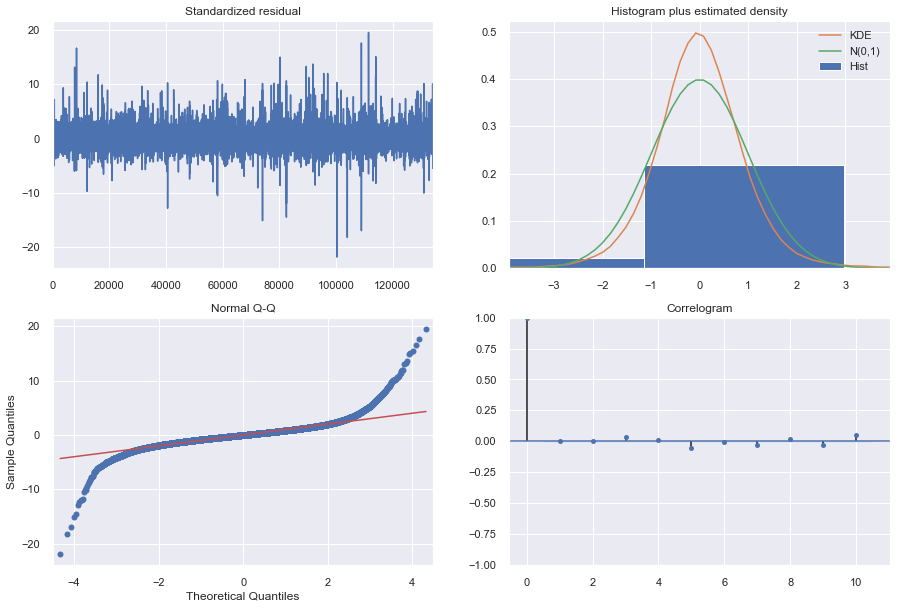

In [74]:
model.plot_diagnostics(figsize=(15,10))
plt.show()


In [ ]:
## PMDARIMA recommends SARIMAX(3,0,2)!!!

In [81]:
# Checking for the best combination due to if-loop
import statsmodels.api as sm

X = df[['SD_LBERG', 'ATMO_LBERG', 'RF_TU', 'V_N', 'V_S1_HHS', 'FF']]
Y = df.P 

X_train = X[:-48]
X_test = X[-48:-24]
Y_train = Y[:-48]
Y_test = Y[-48:-24]

p_values = [0,1,2]
d_values = [0,1,2]
q_values = [0,1,2]

error = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, error_action='ignore', trend='c', order=order, seasonal_order=(1,0,5,1))
            model_fit = model.fit()
            y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
            error.append(mean_absolute_error(Y_test.values.ravel(), y_pred))
            print('ARIMA%s MAE=%.3f' % (order,mean_absolute_error(Y_test.values.ravel(), y_pred)))

//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) MAE=46.625
ARIMA(0, 0, 1) MAE=162.971


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2) MAE=100.338


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) MAE=4.361
ARIMA(0, 1, 1) MAE=5.014


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2) MAE=3.703


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0) MAE=2.820


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1) MAE=2.549


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2) MAE=2.580


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) MAE=16.744


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) MAE=70.678


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2) MAE=156.326


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) MAE=5.825
ARIMA(1, 1, 1) MAE=5.429


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2) MAE=5.291


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0) MAE=2.550


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1) MAE=2.559
ARIMA(1, 2, 2) MAE=2.528


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0) MAE=30.197
ARIMA(2, 0, 1) MAE=40.006


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2) MAE=148.657


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0) MAE=5.004
ARIMA(2, 1, 1) MAE=5.160
ARIMA(2, 1, 2) MAE=5.147


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0) MAE=2.579


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1) MAE=2.611


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2) MAE=2.820


//anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


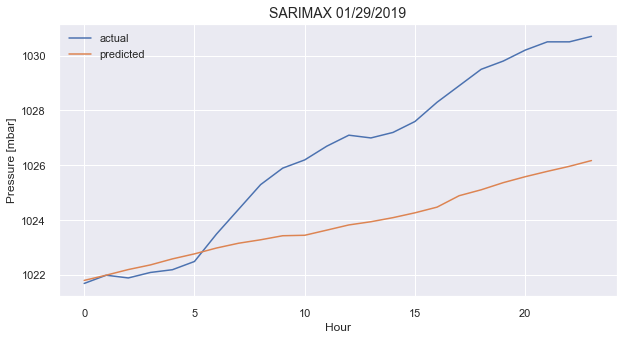

In [206]:
# The combination with the smalles MAE is SARIMAX(0,2,1) 
# model fit with best parameters 

model = sm.tsa.statespace.SARIMAX(Y_train, exog=X_train, trend='c', order=(0,2,1),seasonal_order=(1,0,5,1))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(X_train), end=len(X_train)+23, exog = X_test)
prediction_plot(Y_test,y_pred.values,'Pressure [mbar]','Press_SARIMAX.png','SARIMAX 01/29/2019')

In [83]:
# Metrics
mae0 = mean_absolute_error(Y_test.values.ravel(), y_pred)
rmse0 = np.sqrt(mean_squared_error(Y_test.values.ravel(), y_pred))
r2 = r2_score(Y_test.values.ravel(), y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae0, 2))
print('RMSE:', round(rmse0, 2))
print('R2:', round(r2, 2))

Mean Absolute Error: 2.55
RMSE: 3.05
R2: 0.02


['trend',
 'exog',
 'ar',
 'ma',
 'seasonal_ar',
 'seasonal_ma',
 'exog_variance',
 'measurement_variance',
 'variance']